In [2]:
## Dimensionality Reduction

# ------- IMPORTS --------
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
# ------------------------ 

# For aesthetic plots
def science_plot(fontsize = 9):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()

from sklearn import decomposition


(400, 112, 92)


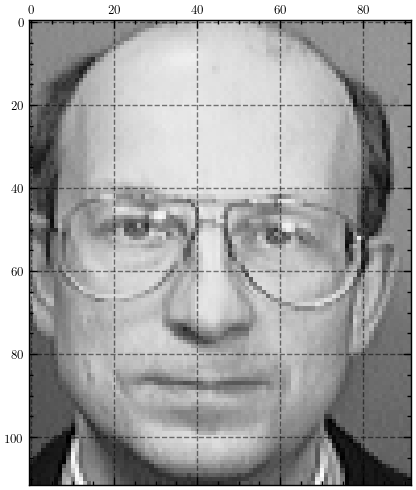

In [3]:
the_faces = np.load("att-faces-400.npz")['dataset']

print(the_faces.shape)

plt.matshow(the_faces[123,:,:], cmap='Greys_r')

(400, 10304)


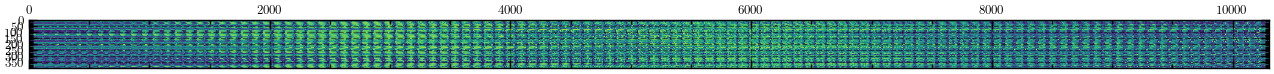

In [4]:
dataset_tab = np.stack([i.flatten() for i in the_faces], axis=0)
plt.matshow(dataset_tab[:, :])
print(dataset_tab.shape)

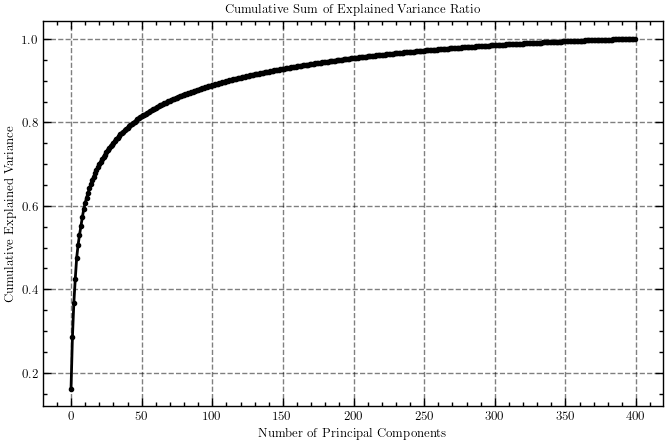

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_samples, n_features = dataset_tab.shape  # (400, 10304)
img_shape = (112, 92)  # Image dimensions

# Assuming dataset_tab has shape 
X = dataset_tab.astype(np.float32)  # Ensure correct dtype

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, 'k.-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Sum of Explained Variance Ratio")
plt.show()

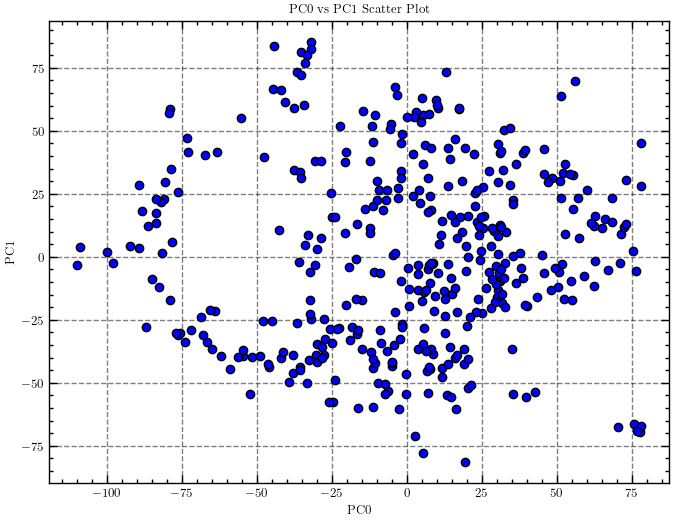

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],color ='b', edgecolors='k')
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("PC0 vs PC1 Scatter Plot")
plt.show()

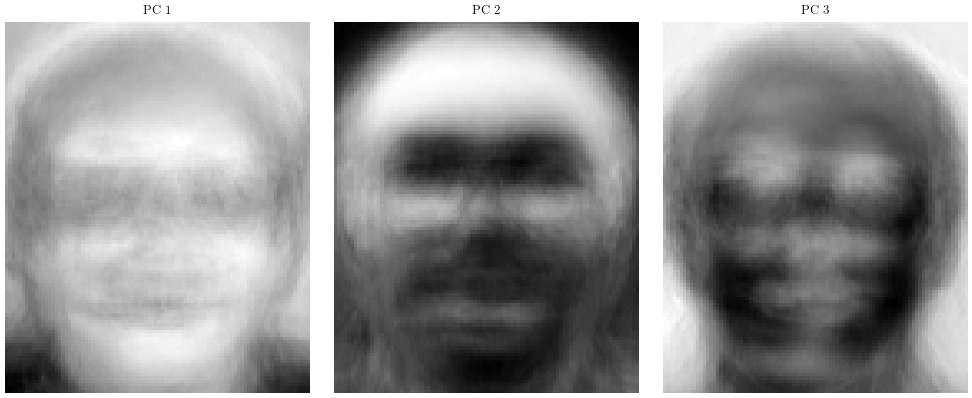

In [7]:
# Select first 3 PCs and reshape
pcs_to_plot = 3
fig, axes = plt.subplots(1, pcs_to_plot, figsize=(10, 4))

for i in range(pcs_to_plot):
    pc_image = pca.components_[i].reshape(img_shape)  # Reshape to (112, 92)
    axes[i].imshow(pc_image, cmap="gray")
    axes[i].set_title(f"PC {i+1}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

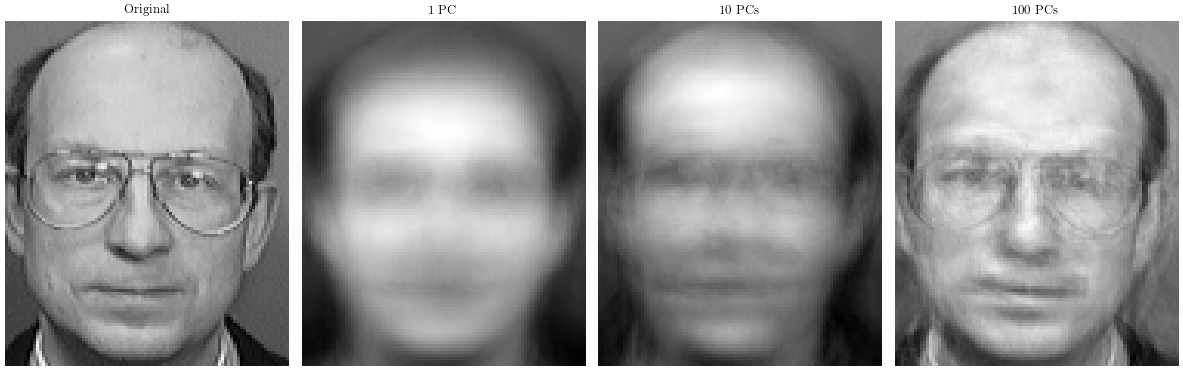

In [8]:
# Function to reconstruct images using the first k PCs
def reconstruct_images(pca, X_pca, scaler, k):
    X_reduced = X_pca[:, :k]  # Keep only first k PCs
    X_reconstructed = np.dot(X_reduced, pca.components_[:k, :])  # Project back
    X_reconstructed = scaler.inverse_transform(X_reconstructed)  # Reverse standardization
    return X_reconstructed

# Reconstruct using 1, 10, and 100 PCs
X_reconstructed_1 = reconstruct_images(pca, X_pca, scaler, 1)
X_reconstructed_10 = reconstruct_images(pca, X_pca, scaler, 10)
X_reconstructed_100 = reconstruct_images(pca, X_pca, scaler, 100)
X_reconstructed_300 = reconstruct_images(pca, X_pca, scaler, 300)

# Select a sample to visualize
sample_idx = 123  # Change this to visualize different images

# Function to plot images
def plot_image(img_array, title, ax):
    img = img_array.reshape(img_shape)  # Reshape to 112×92
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

fig, axes = plt.subplots(1, 4, figsize=(12, 6))

# Original image
plot_image(dataset_tab[sample_idx], "Original", axes[0])

# Reconstructed images
plot_image(X_reconstructed_1[sample_idx], "1 PC", axes[1])
plot_image(X_reconstructed_10[sample_idx], "10 PCs", axes[2])
plot_image(X_reconstructed_100[sample_idx], "100 PCs", axes[3])
plt.tight_layout()
plt.show()



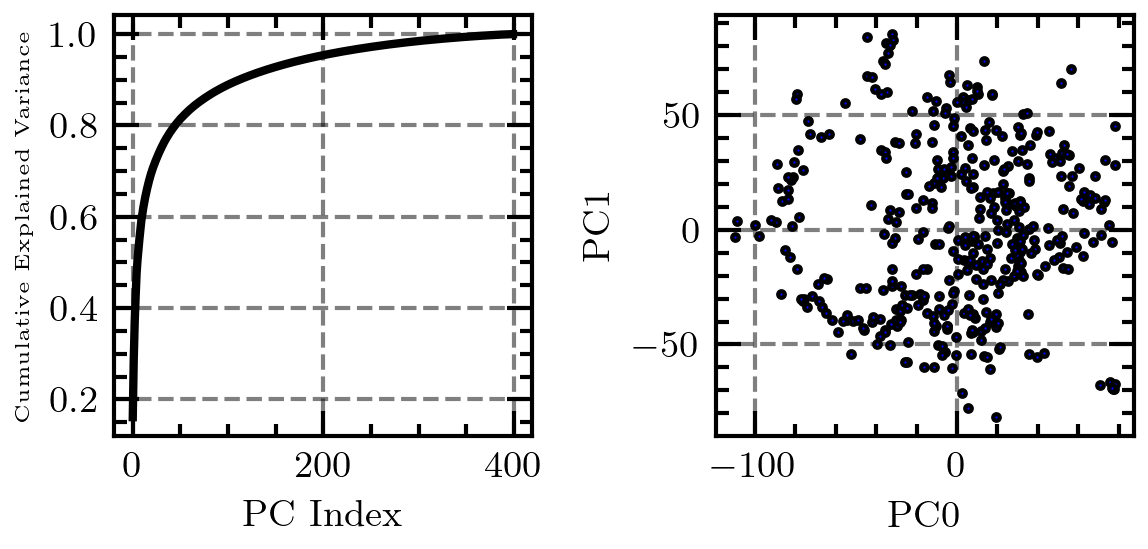

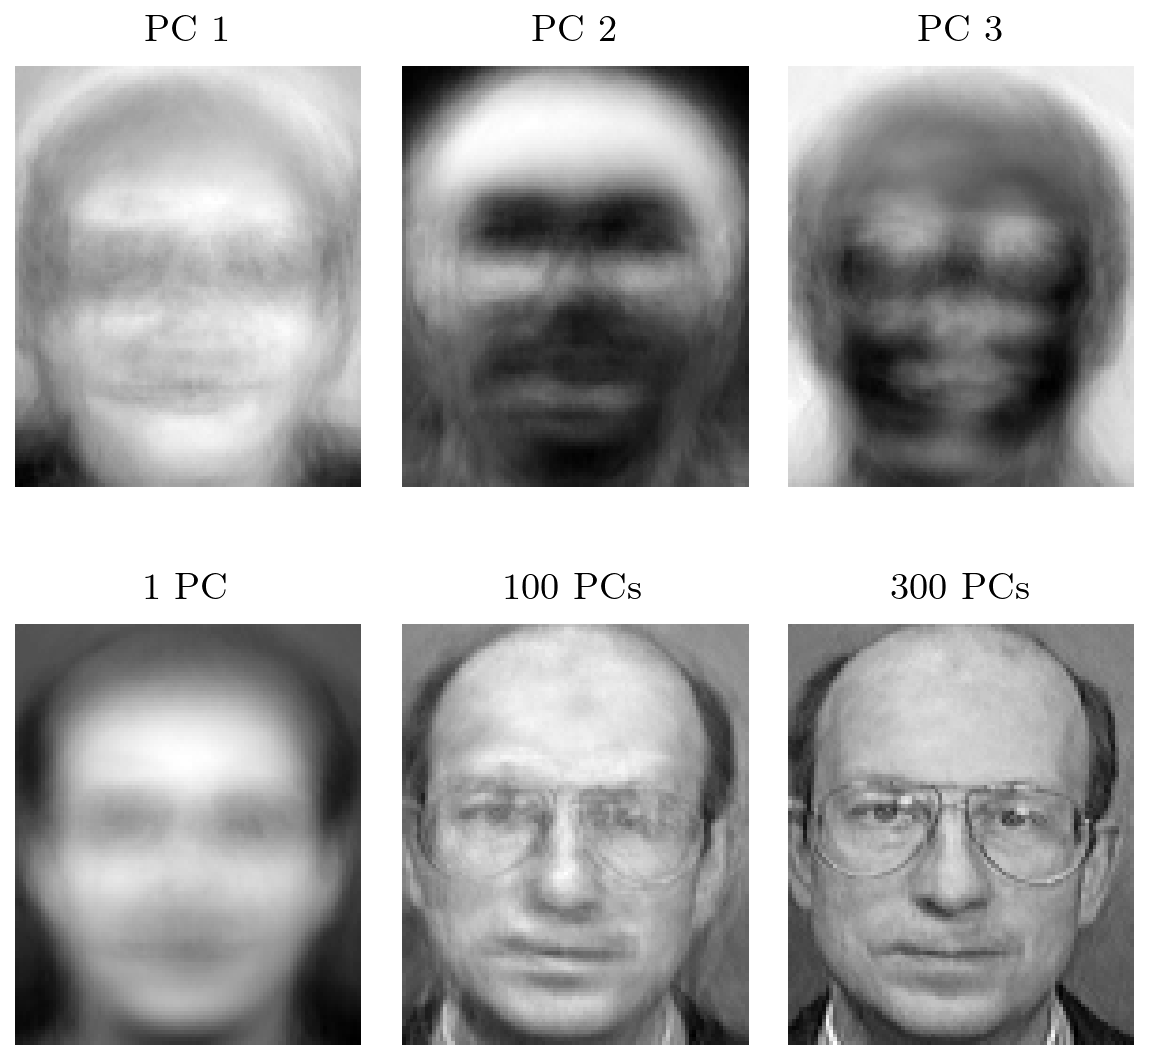

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(4, 2), dpi=300)

axes[0].plot(cumulative_variance, 'k,-')  #
axes[0].set_ylabel("Cumulative Explained Variance", fontsize=5)
axes[0].set_xlabel("PC Index")  

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], s = 2.5,color ='b', edgecolors='k')
axes[1].set_xlabel("PC0")
axes[1].set_ylabel("PC1")

plt.tight_layout()
plt.savefig('fig1.png')
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(4, 4), dpi=300)

for i in range(pcs_to_plot):
    pc_image = pca.components_[i].reshape(img_shape)  # Reshape to (112, 92)
    axes[0][i].imshow(pc_image, cmap="gray")
    axes[0][i].set_title(f"PC {i+1}")
    axes[0][i].axis("off")

plot_image(X_reconstructed_1[sample_idx], "1 PC", axes[1][0])
plot_image(X_reconstructed_100[sample_idx], "100 PCs", axes[1][1])
plot_image(X_reconstructed_300[sample_idx], "300 PCs", axes[1][2])

plt.tight_layout()
plt.savefig('fig2.png')
plt.show()

import sklearn


AttributeError: 'Axes' object has no attribute 'gca'

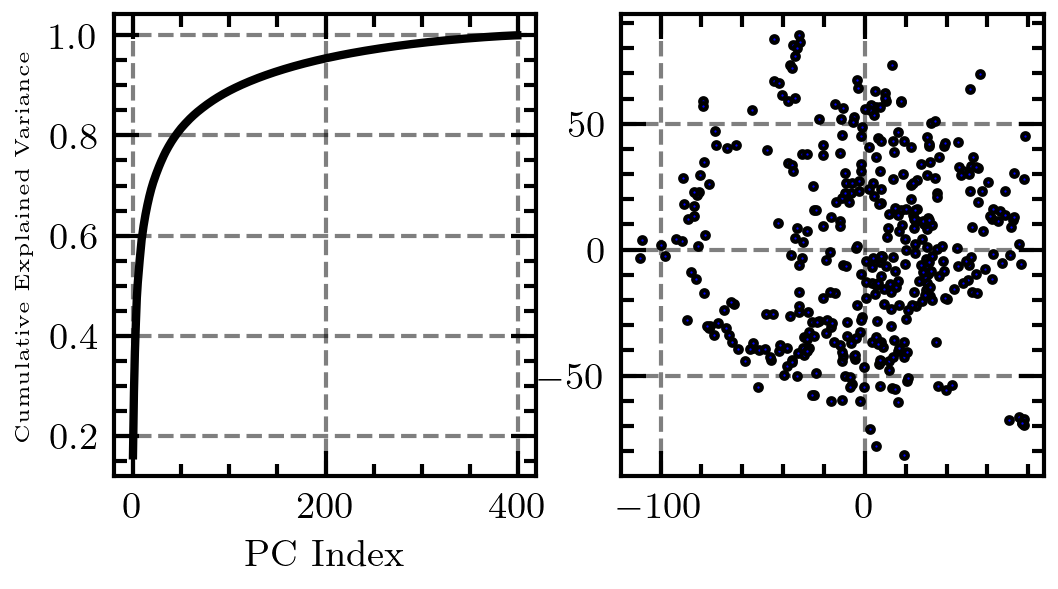

In [ ]:
## PRINCIPAL COMPONENT ANALYSIS
# loading the database
the_faces = np.load("att-faces-400.npz")['dataset']
dataset_tab = np.stack([i.flatten() for i in the_faces], axis=0)
n_samples, n_features = dataset_tab.shape  # (400, 10304)
img_shape = (112, 92)  # Image dimensions
X = dataset_tab.astype(np.float32) 
# Standardize the data
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
# Perform PCA
pca = sklearn.decomposition.PCA()
X_pca = pca.fit_transform(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
fig, axes = plt.subplots(1, 2, figsize=(4, 2), dpi=300)
axes[0].plot(cumulative_variance, 'k,-')  #
axes[0].set_ylabel("Cumulative Explained Variance", fontsize=5)
axes[0].set_xlabel("PC Index")  
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], s = 2.5,color ='b', edgecolors='k')
axes[1].set_xlabel("PC0")
axes[1].set_ylabel("PC1")
plt.tight_layout()
plt.savefig('fig1.png')
plt.show()
def plot_image(img_array, title, ax):
    img = img_array.reshape(img_shape)  # Reshape to 112×92
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")
def reconstruct_images(pca, X_pca, scaler, k):
    X_reduced = X_pca[:, :k]  # Keep only first k PCs
    X_reconstructed = np.dot(X_reduced, pca.components_[:k, :])  # Project back
    X_reconstructed = scaler.inverse_transform(X_reconstructed)  # Reverse standardization
    return X_reconstructed
fig, axes = plt.subplots(2, 3, figsize=(4, 4), dpi=300)
for i in range(pcs_to_plot):
    pc_image = pca.components_[i].reshape(img_shape)  # Reshape to (112, 92)
    axes[0][i].imshow(pc_image, cmap="gray")
    axes[0][i].set_title(f"PC {i+1}")
    axes[0][i].axis("off")
# Reconstruct using 1, 10, and 100 PCs
X_reconstructed_1 = reconstruct_images(pca, X_pca, scaler, 1)
X_reconstructed_10 = reconstruct_images(pca, X_pca, scaler, 10)
X_reconstructed_300 = reconstruct_images(pca, X_pca, scaler, 300)
plot_image(X_reconstructed_1[sample_idx], "1 PC", axes[1][0])
plot_image(X_reconstructed_100[sample_idx], "100 PCs", axes[1][1])
plot_image(X_reconstructed_300[sample_idx], "300 PCs", axes[1][2])
plt.tight_layout()
plt.savefig('fig2.png')
plt.show()
